In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms.functional import pad
import pandas as pd

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
import os
checkpoints = './leaf-classification/checkpoints/'
if not os.path.exists(checkpoints):
    os.makedirs(checkpoints)

## Data processing and feeding the data to data loaders

In [3]:
# converting all images to squares
class SquarePadding:
    def __call__(self, image):
        w, h = image.size
        size = np.max([w, h])
        h_padding = int((size - w) / 2)
        v_padding = int((size - h) / 2)
        padding = (h_padding, v_padding, h_padding, v_padding)
        return pad(image, padding, 0, 'constant')

In [4]:
classes = {
  0: 'Acer_Capillipes',
 1: 'Acer_Circinatum',
 2: 'Acer_Mono',
 3: 'Acer_Opalus',
 4: 'Acer_Palmatum',
 5: 'Acer_Pictum',
 6: 'Acer_Platanoids',
 7: 'Acer_Rubrum',
 8: 'Acer_Rufinerve',
 9: 'Acer_Saccharinum',
 10: 'Alnus_Cordata',
 11: 'Alnus_Maximowiczii',
 12: 'Alnus_Rubra',
 13: 'Alnus_Sieboldiana',
 14: 'Alnus_Viridis',
 15: 'Arundinaria_Simonii',
 16: 'Betula_Austrosinensis',
 17: 'Betula_Pendula',
 18: 'Callicarpa_Bodinieri',
 19: 'Castanea_Sativa',
 20: 'Celtis_Koraiensis',
 21: 'Cercis_Siliquastrum',
 22: 'Cornus_Chinensis',
 23: 'Cornus_Controversa',
 24: 'Cornus_Macrophylla',
 25: 'Cotinus_Coggygria',
 26: 'Crataegus_Monogyna',
 27: 'Cytisus_Battandieri',
 28: 'Eucalyptus_Glaucescens',
 29: 'Eucalyptus_Neglecta',
 30: 'Eucalyptus_Urnigera',
 31: 'Fagus_Sylvatica',
 32: 'Ginkgo_Biloba',
 33: 'Ilex_Aquifolium',
 34: 'Ilex_Cornuta',
 35: 'Liquidambar_Styraciflua',
 36: 'Liriodendron_Tulipifera',
 37: 'Lithocarpus_Cleistocarpus',
 38: 'Lithocarpus_Edulis',
 39: 'Magnolia_Heptapeta',
 40: 'Magnolia_Salicifolia',
 41: 'Morus_Nigra',
 42: 'Olea_Europaea',
 43: 'Phildelphus',
 44: 'Populus_Adenopoda',
 45: 'Populus_Grandidentata',
 46: 'Populus_Nigra',
 47: 'Prunus_Avium',
 48: 'Prunus_X_Shmittii',
 49: 'Pterocarya_Stenoptera',
 50: 'Quercus_Afares',
 51: 'Quercus_Agrifolia',
 52: 'Quercus_Alnifolia',
 53: 'Quercus_Brantii',
 54: 'Quercus_Canariensis',
 55: 'Quercus_Castaneifolia',
 56: 'Quercus_Cerris',
 57: 'Quercus_Chrysolepis',
 58: 'Quercus_Coccifera',
 59: 'Quercus_Coccinea',
 60: 'Quercus_Crassifolia',
 61: 'Quercus_Crassipes',
 62: 'Quercus_Dolicholepis',
 63: 'Quercus_Ellipsoidalis',
 64: 'Quercus_Greggii',
 65: 'Quercus_Hartwissiana',
 66: 'Quercus_Ilex',
 67: 'Quercus_Imbricaria',
 68: 'Quercus_Infectoria_sub',
 69: 'Quercus_Kewensis',
 70: 'Quercus_Nigra',
 71: 'Quercus_Palustris',
 72: 'Quercus_Phellos',
 73: 'Quercus_Phillyraeoides',
 74: 'Quercus_Pontica',
 75: 'Quercus_Pubescens',
 76: 'Quercus_Pyrenaica',
 77: 'Quercus_Rhysophylla',
 78: 'Quercus_Rubra',
 79: 'Quercus_Semecarpifolia',
 80: 'Quercus_Shumardii',
 81: 'Quercus_Suber',
 82: 'Quercus_Texana',
 83: 'Quercus_Trojana',
 84: 'Quercus_Variabilis',
 85: 'Quercus_Vulcanica',
 86: 'Quercus_x_Hispanica',
 87: 'Quercus_x_Turneri',
 88: 'Rhododendron_x_Russellianum',
 89: 'Salix_Fragilis',
 90: 'Salix_Intergra',
 91: 'Sorbus_Aria',
 92: 'Tilia_Oliveri',
 93: 'Tilia_Platyphyllos',
 94: 'Tilia_Tomentosa',
 95: 'Ulmus_Bergmanniana',
 96: 'Viburnum_Tinus',
 97: 'Viburnum_x_Rhytidophylloides',
 98: 'Zelkova_Serrata'}

In [5]:
prediction_dictionary = {
'id': [],
'Acer_Capillipes' : [],
'Acer_Circinatum' : [],
'Acer_Mono' : [],
'Acer_Opalus' : [],
'Acer_Palmatum' : [],
'Acer_Pictum' : [],
'Acer_Platanoids' : [],
'Acer_Rubrum' : [],
'Acer_Rufinerve' : [],
'Acer_Saccharinum' : [],
'Alnus_Cordata' : [],
'Alnus_Maximowiczii' : [],
'Alnus_Rubra' : [],
'Alnus_Sieboldiana' : [],
'Alnus_Viridis' : [],
'Arundinaria_Simonii' : [],
'Betula_Austrosinensis' : [],
'Betula_Pendula' : [],
'Callicarpa_Bodinieri' : [],
'Castanea_Sativa' : [],
'Celtis_Koraiensis' : [],
'Cercis_Siliquastrum' : [],
'Cornus_Chinensis' : [],
'Cornus_Controversa' : [],
'Cornus_Macrophylla' : [],
'Cotinus_Coggygria' : [],
'Crataegus_Monogyna' : [],
'Cytisus_Battandieri' : [],
'Eucalyptus_Glaucescens' : [],
'Eucalyptus_Neglecta' : [],
'Eucalyptus_Urnigera' : [],
'Fagus_Sylvatica' : [],
'Ginkgo_Biloba' : [],
'Ilex_Aquifolium' : [],
'Ilex_Cornuta' : [],
'Liquidambar_Styraciflua' : [],
'Liriodendron_Tulipifera' : [],
'Lithocarpus_Cleistocarpus' : [],
'Lithocarpus_Edulis' : [],
'Magnolia_Heptapeta' : [],
'Magnolia_Salicifolia' : [],
'Morus_Nigra' : [],
'Olea_Europaea' : [],
'Phildelphus' : [],
'Populus_Adenopoda' : [],
'Populus_Grandidentata' : [],
'Populus_Nigra' : [],
'Prunus_Avium' : [],
'Prunus_X_Shmittii' : [],
'Pterocarya_Stenoptera' : [],
'Quercus_Afares' : [],
'Quercus_Agrifolia' : [],
'Quercus_Alnifolia' : [],
'Quercus_Brantii' : [],
'Quercus_Canariensis' : [],
'Quercus_Castaneifolia' : [],
'Quercus_Cerris' : [],
'Quercus_Chrysolepis' : [],
'Quercus_Coccifera' : [],
'Quercus_Coccinea' : [],
'Quercus_Crassifolia' : [],
'Quercus_Crassipes' : [],
'Quercus_Dolicholepis' : [],
'Quercus_Ellipsoidalis' : [],
'Quercus_Greggii' : [],
'Quercus_Hartwissiana' : [],
'Quercus_Ilex' : [],
'Quercus_Imbricaria' : [],
'Quercus_Infectoria_sub' : [],
'Quercus_Kewensis' : [],
'Quercus_Nigra' : [],
'Quercus_Palustris' : [],
'Quercus_Phellos' : [],
'Quercus_Phillyraeoides' : [],
'Quercus_Pontica' : [],
'Quercus_Pubescens' : [],
'Quercus_Pyrenaica' : [],
'Quercus_Rhysophylla' : [],
'Quercus_Rubra' : [],
'Quercus_Semecarpifolia' : [],
'Quercus_Shumardii' : [],
'Quercus_Suber' : [],
'Quercus_Texana' : [],
'Quercus_Trojana' : [],
'Quercus_Variabilis' : [],
'Quercus_Vulcanica' : [],
'Quercus_x_Hispanica' : [],
'Quercus_x_Turneri' : [],
'Rhododendron_x_Russellianum' : [],
'Salix_Fragilis' : [],
'Salix_Intergra' : [],
'Sorbus_Aria' : [],
'Tilia_Oliveri' : [],
'Tilia_Platyphyllos' : [],
'Tilia_Tomentosa' : [],
'Ulmus_Bergmanniana' : [],
'Viburnum_Tinus' : [],
'Viburnum_x_Rhytidophylloides' : [],
'Zelkova_Serrata':[]}

initial_pred_csv = pd.DataFrame(prediction_dictionary)

In [66]:
def getNewRow(theoutputs, id):
  x = {
  'id': id,
  'Acer_Capillipes' : theoutputs[0][data['class_to_idx']['0']],
  'Acer_Circinatum' : theoutputs[0][data['class_to_idx']['1']],
  'Acer_Mono' : theoutputs[0][data['class_to_idx']['2']],
  'Acer_Opalus' : theoutputs[0][data['class_to_idx']['3']],
  'Acer_Palmatum' : theoutputs[0][data['class_to_idx']['4']],
  'Acer_Pictum' : theoutputs[0][data['class_to_idx']['5']],
  'Acer_Platanoids' theoutputs[0][data['class_to_idx']['6']],
  'Acer_Rubrum' : theoutputs[0][data['class_to_idx']['7']],
  'Acer_Rufinerve' : theoutputs[0][data['class_to_idx']['8']],
  'Acer_Saccharinum' :theoutputs[0][data['class_to_idx']['9']],
  'Alnus_Cordata' : theoutputs[0][data['class_to_idx']['10']],
  'Alnus_Maximowiczii' : theoutputs[0][data['class_to_idx']['11']],
  'Alnus_Rubra' : theoutputs[0][data['class_to_idx']['12']],
  'Alnus_Sieboldiana' : theoutputs[0][data['class_to_idx']['13']],
  'Alnus_Viridis' : theoutputs[0][data['class_to_idx']['14']],
  'Arundinaria_Simonii' : theoutputs[0][data['class_to_idx']['15']],
  'Betula_Austrosinensis' : theoutputs[0][data['class_to_idx']['16']],
  'Betula_Pendula' : theoutputs[0][data['class_to_idx']['17']],
  'Callicarpa_Bodinieri' : theoutputs[0][data['class_to_idx']['18']],
  'Castanea_Sativa' : theoutputs[0][data['class_to_idx']['19']],
  'Celtis_Koraiensis' : theoutputs[0][data['class_to_idx']['20']],
  'Cercis_Siliquastrum' : theoutputs[0][data['class_to_idx']['21']],
  'Cornus_Chinensis' : theoutputs[0][data['class_to_idx']['22']],
  'Cornus_Controversa' : theoutputs[0][data['class_to_idx']['23']],
  'Cornus_Macrophylla' : theoutputs[0][data['class_to_idx']['24']],
  'Cotinus_Coggygria' : theoutputs[0][data['class_to_idx']['25']],
  'Crataegus_Monogyna' : theoutputs[0][data['class_to_idx']['26']],
  'Cytisus_Battandieri' : theoutputs[0][data['class_to_idx']['27']],
  'Eucalyptus_Glaucescens' : theoutputs[0][data['class_to_idx']['28']],
  'Eucalyptus_Neglecta' : theoutputs[0][data['class_to_idx']['29']],
  'Eucalyptus_Urnigera' : theoutputs[0][data['class_to_idx']['30']],
  'Fagus_Sylvatica' : theoutputs[0][data['class_to_idx']['31']],
  'Ginkgo_Biloba' : theoutputs[0][data['class_to_idx']['32']],
  'Ilex_Aquifolium' : theoutputs[0][data['class_to_idx']['33']],
  'Ilex_Cornuta' : theoutputs[0][data['class_to_idx']['34']],
  'Liquidambar_Styraciflua' : theoutputs[0][data['class_to_idx']['35']],
  'Liriodendron_Tulipifera' : theoutputs[0][data['class_to_idx']['36']],
  'Lithocarpus_Cleistocarpus' : theoutputs[0][data['class_to_idx']['37']],
  'Lithocarpus_Edulis' : theoutputs[0][data['class_to_idx']['38']],
  'Magnolia_Heptapeta' : theoutputs[0][data['class_to_idx']['39']],
  'Magnolia_Salicifolia' : theoutputs[0][data['class_to_idx']['40']],
  'Morus_Nigra' : theoutputs[0][data['class_to_idx']['41']],
  'Olea_Europaea' : theoutputs[0][data['class_to_idx']['42']],
  'Phildelphus' : theoutputs[0][data['class_to_idx']['43']],
  'Populus_Adenopoda' : theoutputs[0][data['class_to_idx']['44']],
  'Populus_Grandidentata' : theoutputs[0][data['class_to_idx']['45']],
  'Populus_Nigra' : theoutputs[0][data['class_to_idx']['46']],
  'Prunus_Avium' : theoutputs[0][data['class_to_idx']['47']],
  'Prunus_X_Shmittii' : theoutputs[0][data['class_to_idx']['48']],
  'Pterocarya_Stenoptera' : theoutputs[0][data['class_to_idx']['49']],
  'Quercus_Afares' : theoutputs[0][data['class_to_idx']['50']],
  'Quercus_Agrifolia' : theoutputs[0][data['class_to_idx']['51']],
  'Quercus_Alnifolia' : theoutputs[0][data['class_to_idx']['52']],
  'Quercus_Brantii' : theoutputs[0][data['class_to_idx']['53']],
  'Quercus_Canariensis' : theoutputs[0][data['class_to_idx']['54']],
  'Quercus_Castaneifolia' : theoutputs[0][data['class_to_idx']['55']],
  'Quercus_Cerris' : theoutputs[0][data['class_to_idx']['56']],
  'Quercus_Chrysolepis' : theoutputs[0][data['class_to_idx']['57']],
  'Quercus_Coccifera' : theoutputs[0][data['class_to_idx']['58']],
  'Quercus_Coccinea' : theoutputs[0][data['class_to_idx']['59']],
  'Quercus_Crassifolia' : theoutputs[0][data['class_to_idx']['60']],
  'Quercus_Crassipes' : theoutputs[0][data['class_to_idx']['61']],
  'Quercus_Dolicholepis' : theoutputs[0][data['class_to_idx']['62']],
  'Quercus_Ellipsoidalis' : theoutputs[0][data['class_to_idx']['63']],
  'Quercus_Greggii' : theoutputs[0][data['class_to_idx']['64']],
  'Quercus_Hartwissiana' : theoutputs[0][data['class_to_idx']['65']],
  'Quercus_Ilex' : theoutputs[0][data['class_to_idx']['66']],
  'Quercus_Imbricaria' : theoutputs[0][data['class_to_idx']['67']],
  'Quercus_Infectoria_sub' : theoutputs[0][data['class_to_idx']['68']],
  'Quercus_Kewensis' : theoutputs[0][data['class_to_idx']['69']],
  'Quercus_Nigra' : theoutputs[0][data['class_to_idx']['70']],
  'Quercus_Palustris' : theoutputs[0][data['class_to_idx']['71']],
  'Quercus_Phellos' : theoutputs[0][data['class_to_idx']['72']],
  'Quercus_Phillyraeoides' : theoutputs[0][data['class_to_idx']['73']],
  'Quercus_Pontica' : theoutputs[0][data['class_to_idx']['74']],
  'Quercus_Pubescens' : theoutputs[0][data['class_to_idx']['75']],
  'Quercus_Pyrenaica' : theoutputs[0][data['class_to_idx']['76']],
  'Quercus_Rhysophylla' : theoutputs[0][data['class_to_idx']['77']],
  'Quercus_Rubra' : theoutputs[0][data['class_to_idx']['78']],
  'Quercus_Semecarpifolia' : theoutputs[0][data['class_to_idx']['79']],
  'Quercus_Shumardii' : theoutputs[0][data['class_to_idx']['81']],
  'Quercus_Suber' : theoutputs[0][data['class_to_idx']['81']],
  'Quercus_Texana' : theoutputs[0][data['class_to_idx']['82']],
  'Quercus_Trojana' :theoutputs[0][data['class_to_idx']['83']],
  'Quercus_Variabilis' : theoutputs[0][data['class_to_idx']['84']],
  'Quercus_Vulcanica' : theoutputs[0][data['class_to_idx']['85']],
  'Quercus_x_Hispanica' : theoutputs[0][data['class_to_idx']['86']],
  'Quercus_x_Turneri' : theoutputs[0][data['class_to_idx']['87']],
  'Rhododendron_x_Russellianum' : theoutputs[0][data['class_to_idx']['88']],
  'Salix_Fragilis' : theoutputs[0][data['class_to_idx']['89']],
  'Salix_Intergra' : theoutputs[0][data['class_to_idx']['90']],
  'Sorbus_Aria' : theoutputs[0][data['class_to_idx']['91']],
  'Tilia_Oliveri' : theoutputs[0][data['class_to_idx']['92']],
  'Tilia_Platyphyllos' : theoutputs[0][data['class_to_idx']['93']],
  'Tilia_Tomentosa' : theoutputs[0][data['class_to_idx']['94']],
  'Ulmus_Bergmanniana' : theoutputs[0][data['class_to_idx']['95']],
  'Viburnum_Tinus' : theoutputs[0][data['class_to_idx']['96']],
  'Viburnum_x_Rhytidophylloides': theoutputs[0][data['class_to_idx']['97']],
  'Zelkova_Serrata': theoutputs[0][data['class_to_idx']['98']]
  }

  return x

SyntaxError: invalid syntax (818320334.py, line 10)

In [37]:
ls

arjun/               leaf-classification/ uwimg/
data-prep.ipynb      training.ipynb


In [8]:
def get_data(augmentation=0):
    train_transform = transforms.Compose([
        SquarePadding(), # converts all the images to square                              
        transforms.Resize(128),
        transforms.RandomCrop(128, padding=8, padding_mode='edge'),
        transforms.RandomHorizontalFlip(), # for flips
        transforms.ToTensor(),
    ])
    
    test_transform = transforms.Compose([
        SquarePadding(), # converts all the images to square  
        transforms.Resize(128),
        transforms.ToTensor(),
    ])

    trainset = torchvision.datasets.ImageFolder(root = './leaf-classification/train/', transform = train_transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 0)

    testset = torchvision.datasets.ImageFolder(root = './leaf-classification/test/', transform = test_transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size = 1, shuffle = False, num_workers = 0)

    class_to_idx = trainset.class_to_idx
    #print(class_to_idx)
    # value is a string and the key is an int in this case
    idx_to_class = {v: k for k, v in class_to_idx.items()}
    print(idx_to_class)
    # idx_to_name = {k: classes[v] for k,v in idx_to_class.items()}
    
    # 'to_name':idx_to_name,
    return {'train': trainloader, 'test': testloader, 'to_class': idx_to_class, 'class_to_idx': class_to_idx}

data = get_data()

{0: 'Acer_Capillipes', 1: 'Acer_Circinatum', 2: 'Acer_Mono', 3: 'Acer_Opalus', 4: 'Acer_Palmatum', 5: 'Acer_Pictum', 6: 'Acer_Platanoids', 7: 'Acer_Rubrum', 8: 'Acer_Rufinerve', 9: 'Acer_Saccharinum', 10: 'Alnus_Cordata', 11: 'Alnus_Maximowiczii', 12: 'Alnus_Rubra', 13: 'Alnus_Sieboldiana', 14: 'Alnus_Viridis', 15: 'Arundinaria_Simonii', 16: 'Betula_Austrosinensis', 17: 'Betula_Pendula', 18: 'Callicarpa_Bodinieri', 19: 'Castanea_Sativa', 20: 'Celtis_Koraiensis', 21: 'Cercis_Siliquastrum', 22: 'Cornus_Chinensis', 23: 'Cornus_Controversa', 24: 'Cornus_Macrophylla', 25: 'Cotinus_Coggygria', 26: 'Crataegus_Monogyna', 27: 'Cytisus_Battandieri', 28: 'Eucalyptus_Glaucescens', 29: 'Eucalyptus_Neglecta', 30: 'Eucalyptus_Urnigera', 31: 'Fagus_Sylvatica', 32: 'Ginkgo_Biloba', 33: 'Ilex_Aquifolium', 34: 'Ilex_Cornuta', 35: 'Liquidambar_Styraciflua', 36: 'Liriodendron_Tulipifera', 37: 'Lithocarpus_Cleistocarpus', 38: 'Lithocarpus_Edulis', 39: 'Magnolia_Heptapeta', 40: 'Magnolia_Salicifolia', 41: 'M

torch.Size([8, 3, 128, 128])
90
40
50
13
42
39
70
56


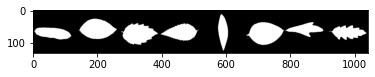

In [9]:
data_iterator = iter(data['train'])
images, labels = data_iterator.next()
images = images[:8]
print(images.size())

for j in range(8):
    print(labels[j].item())

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print("Labels:" + ', '.join('%9s' % data['to_name'][labels[j].item()] for j in range(8)))

# print labels
# need to uncomment this statement when I resolve to_name in the previous cell
# print("Labels:" + ', '.join('%9s' % data['to_name'][labels[j].item()] for j in range(8)))

In [31]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__() # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # Input = 128 x 128 x 3 image
        # Output = 64 x 64 x 16 (due to 16 filters)
        # 3x3 filter size (they also have 3 channels)
        # stride 2 (downsampling by factor of 2)
        # Output image: 16x16x16
        self.conv1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
      
        
        self.fc1 = nn.Linear(65536, 2048)
        self.fc2 = nn.Linear(2048, 99)


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [32]:
# defining the training and the accuracy functions to evaluate the performace of the model
def train(net, dataloader, epochs=1, lr=0.01, momentum=0.9, decay=0.0, verbose=1):
  net.to(device)
  losses = []
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=decay)
  for epoch in range(epochs):
    sum_loss = 0.0
    for i, batch in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch[0].to(device), batch[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # autograd magic, computes all the partial derivatives
        optimizer.step() # takes a step in gradient direction

        # print statistics
        losses.append(loss.item())

        if verbose:
          print('[%d, %5d] loss: %.9f' %
              (epoch + 1, i + 1, loss.item() / 100))
        
  return losses

def accuracy(net, dataloader):
  correct = 0
  total = 0
  with torch.no_grad():
      for batch in dataloader:
          images, labels = batch[0].to(device), batch[1].to(device)
          outputs = F.softmax(net(images))
          _, predicted = torch.max(outputs.data, 1)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct/total

In [33]:
conv_net = SimpleConvNet()

conv_losses = train(conv_net, data['train'], epochs=9, lr=.01)
conv_losses = train(conv_net, data['train'], epochs=12, lr=.001)


#plt.plot(smooth(conv_losses, 50))

print("Training accuracy: %f" % accuracy(conv_net, data['train']))

[1,     1] loss: 0.045955691
[1,     2] loss: 0.045922961
[1,     3] loss: 0.046007090
[1,     4] loss: 0.045819039
[1,     5] loss: 0.045901723
[1,     6] loss: 0.045774040
[1,     7] loss: 0.045640316
[1,     8] loss: 0.045323157
[2,     1] loss: 0.044477062
[2,     2] loss: 0.044537592
[2,     3] loss: 0.044256601
[2,     4] loss: 0.044343715
[2,     5] loss: 0.044013114
[2,     6] loss: 0.042968564
[2,     7] loss: 0.043270440
[2,     8] loss: 0.043134093
[3,     1] loss: 0.040361428
[3,     2] loss: 0.039455757
[3,     3] loss: 0.039312131
[3,     4] loss: 0.039908493
[3,     5] loss: 0.038673398
[3,     6] loss: 0.037285447
[3,     7] loss: 0.035266476
[3,     8] loss: 0.036372859
[4,     1] loss: 0.034392915
[4,     2] loss: 0.035785320
[4,     3] loss: 0.036272271
[4,     4] loss: 0.035972610
[4,     5] loss: 0.035904598
[4,     6] loss: 0.036720617
[4,     7] loss: 0.034711852
[4,     8] loss: 0.038155510
[5,     1] loss: 0.033010068
[5,     2] loss: 0.034057655
[5,     3] los

/var/folders/5l/w0yjzgfx7q33qd8v9r_l9yfc0000gn/T/ipykernel_43231/2943227330.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(net(images))


Training accuracy: 0.461616


## Results - 
The accuracy of the model is at a 46 percent right now. I tried implementing logistic regression in the notebook theoretically knowing that it would be giving the best results here. But did got stuck implementing it and did not have time. 